# Optimización

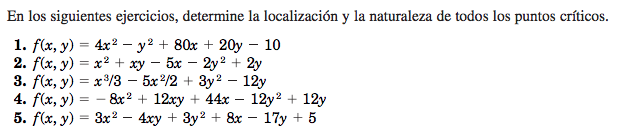

In [245]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [246]:
var ("x y")

In [247]:
!pip install pulp

In [248]:
from pulp import *

In [249]:
f1= 4*x**2 -y**2 + 80*x +20*y -10
f2= x**2 + x*y -5*x -2*y**2 + 2*y
f3= (x**3/3) - (5*x**2/2) + 3*y**2 -12*y
f4= -8*x**2 + 12*x*y + 44*x - 12*y**2 + 12*y
f5= 3*x**2 - 4*x*y + 3*y**2 + 8*x -17*y + 5
f1, f2, f3, f4, f5


In [250]:
nablaf1 = [ f1.diff(var) for var in [x,y] ]
nablaf2 = [ f2.diff(var) for var in [x,y] ]
nablaf3 = [ f3.diff(var) for var in [x,y] ]
nablaf4 = [ f4.diff(var) for var in [x,y] ]
nablaf5 = [ f5.diff(var) for var in [x,y] ]
nablaf1, nablaf2, nablaf3, nablaf4, nablaf5


In [251]:
#Puntos criticos
pcs1= solve(nablaf1)
pcs2= solve(nablaf2)
pcs3= solve(nablaf3)
pcs4= solve(nablaf4)
pcs5= solve(nablaf5)
pcs1, pcs2, pcs3, pcs4, pcs5

In [252]:
H1= hessian(f1,[x,y])
H2= hessian(f2,[x,y])
H3= hessian(f3,[x,y])
H4= hessian(f4,[x,y])
H5= hessian(f5,[x,y])
H1, H2, H3, H4, H5

⎛⎡8  0 ⎤  ⎡2  1 ⎤  ⎡2⋅x - 5  0⎤  ⎡-16  12 ⎤  ⎡6   -4⎤⎞
⎜⎢     ⎥, ⎢     ⎥, ⎢          ⎥, ⎢        ⎥, ⎢      ⎥⎟
⎝⎣0  -2⎦  ⎣1  -4⎦  ⎣   0     6⎦  ⎣12   -24⎦  ⎣-4  6 ⎦⎠

In [253]:
for pc in pcs3:
    eig = H3.subs(pc).eigenvals()
    print ("Punto critico:",pc," sus eigenvalores son: ",eig)

Punto critico: {x: 0, y: 2}  sus eigenvalores son:  {6: 1, -5: 1}
Punto critico: {x: 5, y: 2}  sus eigenvalores son:  {6: 1, 5: 1}


In [254]:
H1.eigenvals(), H2.eigenvals(), H4.eigenvals(), H5.eigenvals()

In [255]:
print ('Para f1 los puntos criticos son: ' ,pcs1 ,'y es punto silla.')
print ('Para f2 los puntos criticos son: ' ,pcs2 ,'y es punto silla.')
print ('Para f3 los puntos criticos son: ' ,pcs3 ,'y es punto silla y minimo.')
print ('Para f4 los puntos criticos son: ' ,pcs4 ,'y es maximo.')
print ('Para f5 los puntos criticos son: ' ,pcs5 ,'y es minimo.')

Para f1 los puntos criticos son:  {x: -10, y: 10} y es punto silla.
Para f2 los puntos criticos son:  {x: 2, y: 1} y es punto silla.
Para f3 los puntos criticos son:  [{x: 0, y: 2}, {x: 5, y: 2}] y es punto silla y minimo.
Para f4 los puntos criticos son:  {x: 5, y: 3} y es maximo.
Para f5 los puntos criticos son:  {x: 1, y: 7/2} y es minimo.


6. Una compañía fabrica y venden dos modelos de lámpara L1 y L2. Para su fabricación se necesita un trabajo manual de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina para L1 y de 10 minutos para L2. Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2, respectivamente, planificar la producción para obtener el máximo beneficio.

In [256]:
mi_lp_fabrica = pulp.LpProblem( "Mi Fabrica", pulp.LpMaximize)

L1 = pulp.LpVariable('L1',lowBound=0, upBound= None, cat='Continuous')
L2 = pulp.LpVariable('L2',lowBound=0, upBound= None, cat='Continuous')

#Objective funtcion
mi_lp_fabrica += 15*L1 +10*L2

#Constraints
mi_lp_fabrica += 20*L1 + 30*L2 <= 6000
mi_lp_fabrica += 20*L1 + 10*L2 <= 4800

In [257]:
mi_lp_fabrica

Mi Fabrica:
MAXIMIZE
15*L1 + 10*L2 + 0
SUBJECT TO
_C1: 20 L1 + 30 L2 <= 6000

_C2: 20 L1 + 10 L2 <= 4800

VARIABLES
L1 Continuous
L2 Continuous

In [258]:
mi_lp_fabrica.solve()
pulp.LpStatus[mi_lp_fabrica.status]

'Optimal'

In [259]:
for variable in mi_lp_fabrica.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

L1 = 210.0
L2 = 60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [260]:
mi_lp_paquetes = pulp.LpProblem( "Paquetes", pulp.LpMaximize)

P1 = pulp.LpVariable('P1',lowBound=0, upBound= None, cat='Continuous')
P2 = pulp.LpVariable('P2',lowBound=0, upBound= None, cat='Continuous')

#Objective funtcion
mi_lp_paquetes += 6.5*P1 +7*P2

#Constraints
mi_lp_paquetes += 2*P1 + 3*P2 <= 600
mi_lp_paquetes += P1 + P2 <= 500
mi_lp_paquetes += 2*P1 + P2 <= 400

In [261]:
mi_lp_paquetes

Paquetes:
MAXIMIZE
6.5*P1 + 7*P2 + 0.0
SUBJECT TO
_C1: 2 P1 + 3 P2 <= 600

_C2: P1 + P2 <= 500

_C3: 2 P1 + P2 <= 400

VARIABLES
P1 Continuous
P2 Continuous

In [262]:
mi_lp_paquetes.solve()
pulp.LpStatus[mi_lp_paquetes.status]

'Optimal'

In [263]:
for variable in mi_lp_paquetes.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

P1 = 150.0
P2 = 100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [264]:
mi_lp_pollos = pulp.LpProblem( "Pollos", pulp.LpMinimize)

x = pulp.LpVariable('x',lowBound=0, upBound= None, cat='Continuous')
y = pulp.LpVariable('y',lowBound=0, upBound= None, cat='Continuous')

#Objective funtcion
mi_lp_pollos += 10*x + 30*y

#Constraints
mi_lp_pollos += x + 5*y >= 15
mi_lp_pollos += 5*x + y >= 15

In [265]:
mi_lp_pollos

Pollos:
MINIMIZE
10*x + 30*y + 0
SUBJECT TO
_C1: x + 5 y >= 15

_C2: 5 x + y >= 15

VARIABLES
x Continuous
y Continuous

In [266]:
mi_lp_pollos.solve()
pulp.LpStatus[mi_lp_pollos.status]

'Optimal'

In [267]:
for variable in mi_lp_pollos.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

x = 2.5
y = 2.5


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [268]:
mi_lp_pastillas = pulp.LpProblem( "Pastillas", pulp.LpMaximize)

G = pulp.LpVariable('G',lowBound=0, upBound= None, cat='Continuous')
P = pulp.LpVariable('P',lowBound=0, upBound= None, cat='Continuous')

#Objective funtcion
mi_lp_pastillas += 2*G + P

#Constraints
mi_lp_pastillas += 40*G +30*P <= 600
mi_lp_pastillas += G >= 3
mi_lp_pastillas += -2*G + P >=0

In [269]:
mi_lp_pastillas

Pastillas:
MAXIMIZE
2*G + 1*P + 0
SUBJECT TO
_C1: 40 G + 30 P <= 600

_C2: G >= 3

_C3: - 2 G + P >= 0

VARIABLES
G Continuous
P Continuous

In [270]:
mi_lp_pastillas.solve()
pulp.LpStatus[mi_lp_pastillas.status]

'Optimal'

In [271]:
for variable in mi_lp_pastillas.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

G = 6.0
P = 12.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [272]:
mi_lp_escuela = pulp.LpProblem( "Excursion", pulp.LpMinimize)

G = pulp.LpVariable('G',lowBound=0, upBound= None, cat='Continuous')
P = pulp.LpVariable('P',lowBound=0, upBound= None, cat='Continuous')

#Objective funtcion
mi_lp_escuela += 800*G + 600*P

#Constraints
mi_lp_escuela += G + P <= 9
mi_lp_escuela += 50*G +40*P >= 400

In [273]:
mi_lp_escuela

Excursion:
MINIMIZE
800*G + 600*P + 0
SUBJECT TO
_C1: G + P <= 9

_C2: 50 G + 40 P >= 400

VARIABLES
G Continuous
P Continuous

In [274]:
mi_lp_escuela.solve()
pulp.LpStatus[mi_lp_escuela.status]

'Optimal'

In [275]:
for variable in mi_lp_escuela.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

G = 4.0
P = 5.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [276]:
from scipy.stats import linregress
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pylab as plt

np.random.seed(2)
altura = np.random.normal(171,10,30) #se genera la altura de cada uno de los 30 individuos
altura

array([166.83242153, 170.43733173, 149.63803904, 187.40270808,
       153.06564415, 162.58252634, 176.02881417, 158.54711913,
       160.42047781, 161.90992385, 176.51454045, 193.92208013,
       171.41539393, 159.82074555, 176.39058321, 165.038403  ,
       170.80869503, 182.7500122 , 163.52129051, 171.09025251,
       162.21892107, 169.4356583 , 173.56570452, 161.11220951,
       167.61178034, 168.63815969, 164.62344988, 159.12387714,
       156.78782773, 169.46504804])

In [277]:
np.random.seed(94)
peso = np.random.normal(80,10,30) #se genera el peso
peso

array([87.43453216, 95.2118336 , 72.93143277, 97.5277759 , 58.1657948 ,
       70.00276631, 69.90387697, 80.31043677, 79.94978258, 84.59165579,
       79.06872976, 82.18841093, 72.75709181, 90.59847827, 90.1739527 ,
       72.63688798, 80.34913975, 79.88564152, 80.24879288, 75.25350054,
       69.33535567, 90.62970768, 81.67092895, 74.25964768, 76.3108092 ,
       80.12722449, 83.73143971, 70.31035816, 76.99489258, 91.22915335])

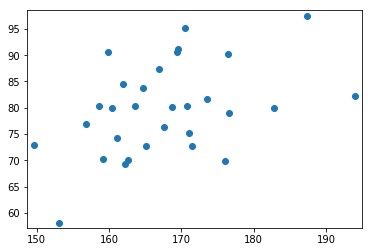

In [278]:
#graficamos los datos generados para ver si suena logico hacer un ajuste lineal
plt.plot(altura, peso, 'o')
plt.xlim(np.min(altura) -1, np.max(altura) +1)
plt.ylim(np.min(peso) -1, np.max(peso) +1)

In [279]:
#calculamos los coeficientes del ajuste (a X + b)
a, b = np.polyfit(altura, peso, 1)
#calculamos el coeficiente de correlación
r = np.corrcoef(altura, peso)

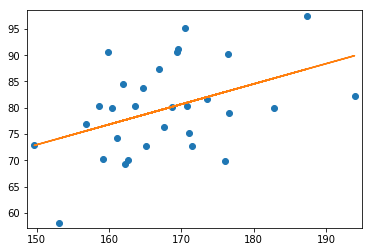

In [280]:
#graficamos los datos con la recta del ajuste lineal
plt.plot(altura, peso, 'o')
plt.xlim(np.min(altura) -1, np.max(altura) +1)
plt.ylim(np.min(peso) -1, np.max(peso) +1)
plt.plot(altura, a * altura + b)

In [281]:
var("ALTURA PESO")

In [282]:
PESO = a*ALTURA + b
PESO

In [283]:
PESO.subs(ALTURA,195)

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [30]:
!ls

ExamenModPablo.ipynb banking.csv


In [31]:
import os
import pandas as pd

banking = pd.read_csv(os.path.join('banking.csv'))
print(banking.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [32]:
banking.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [33]:
labels = banking.y.values
features = banking[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day_of_week','campaign', 'pdays', 'previous','poutcome','emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']]

In [34]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
pd.get_dummies(features).head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,1,0,0,0,0,0,1,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,0,0,1,0,0,0,0,1
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,1,0,0,0,0,0,1,0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,...,0,0,1,0,0,0,0,0,0,1


In [50]:
features_dummies = pd.get_dummies(features,columns=['poutcome','day_of_week','job','marital','education','default', 'housing','loan','contact','month'])
features_dummies.head(n=3)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,1,0,0,0,0,0,0,0,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,0,0,1,0,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,0,0,1,0,0,0,0,0


In [51]:
data = features_dummies.values

In [52]:
data[0]

array([ 4.4000e+01,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.4000e+00,
        9.3444e+01, -3.6100e+01,  4.9630e+00,  5.2281e+03,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00])

In [53]:
import numpy as np
np.isnan(data).any()

False

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data, test_data, train_label, test_label = train_test_split(data, labels, random_state=0)

imp = Imputer()
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data)

In [55]:
np.isnan(train_data_finite).any()

False

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(train_data_finite, train_label)
print("logistic regression score: %f" % 
      lr.score(test_data_finite, test_label))

logistic regression score: 1.000000


In [61]:
data[2]

array([ 2.8000e+01,  3.0000e+00,  6.0000e+00,  2.0000e+00, -1.7000e+00,
        9.4055e+01, -3.9800e+01,  7.2900e-01,  4.9916e+03,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00])

In [76]:
ps6 = data[6]
resultado=lr.predict(ps6[np.newaxis,:])
resultado

array([0])

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [77]:
if resultado >= 1:
    print("YES, EL CLIENTE SE SUSCRIBIRA")
else:
    print("NO, EL CLIENTE NO SE SUSCRIBIRA")

NO, EL CLIENTE NO SE SUSCRIBIRA
